<a href="https://colab.research.google.com/github/pk142/DSML/blob/main/Netflix_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("original_netflix.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df_copy = pd.DataFrame(data)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Basic Analysis
1. Un-nesting the columns
a. Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

2. Handling null values
a. For categorical variables with null values, update those rows as
unknown_column_name.
Example : Replace missing value with Unknown Actor for missing value in
Actors column.
b. Replace with 0 for continuous variables having null values.

3.date_added make as date format


A)Basic Analysis: This columns have missing value
Column Name:
1.director
2.cast
3.country
4.date_added
5.rating
6.duration

B)Basic Analysis : Nested Data
Column Name:
1.Cast
2.List_in
3.Discription

C)Basic Analysis : Date is in a object datatype



1.Categorical Column (A_Null_Value) : Director,cast,country,date_added,rating,duration(TV) = unknown_column_name;
2.countinues : duration (Movies) = 0

In [ ]:
# Handling Analysis
# It will make every NaN value to 0 as to note in duration only movie type have NaN value
df['duration']=df['duration'].fillna(0)


In [ ]:
#Coulmn which have categorical data fill with "Unknown_Cloumn_Name"

df['director']=df['director'].fillna("Unknow_Director")
df['cast']=df['cast'].fillna("Unknow_Cast")
df['country']=df['country'].fillna("Unknow_Country")
df['date_added']=df['date_added'].fillna("Unknow_Date_added")
df['rating']=df['rating'].fillna("Unknow_Rating")

In [ ]:
#Apply datetime to date_added column

df['date_added']=df['date_added'].apply(lambda x: pd.to_datetime(x, errors='coerce') if '-' in x else x)

In [ ]:
#Handling Nested Data
df_director = df[['show_id','director']]
df_director = df_director.assign(director=df_director['director'].str.split(', '))
df_director=df_director.explode('director')

df_cast = df[['show_id','cast']]
df_cast = df_cast.assign(cast=df_cast['cast'].str.split(', '))
df_cast=df_cast.explode('cast')

df_country = df[['show_id','country']]
df_country = df_country.assign(country=df_country['country'].str.split(', '))
df_country=df_country.explode('country')

df_listed_in = df[['show_id','listed_in']]
df_listed_in = df_listed_in.assign(listed_in=df_listed_in['listed_in'].str.split(', '))
df_listed_in=df_listed_in.explode('listed_in')

In [ ]:
#merge with copy dataframe
df_copy = pd.merge(df_copy, df_director, on='show_id', how='left')
df_copy = pd.merge(df_copy, df_cast, on='show_id', how='left')
df_copy = pd.merge(df_copy, df_country, on='show_id', how='left')
df_copy = pd.merge(df_copy, df_listed_in, on='show_id', how='left')

In [ ]:
df_movies = df[df['type']=='Movie']
df_TvShows = df[df['type']=='TV Show']

Starting Analysis
1. Univeriable
2. BiVeriable
3. Multiveriable

Data information simple and with visulization

In [ ]:
type_counts = df['type'].value_counts()

In [ ]:
type_counts

Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

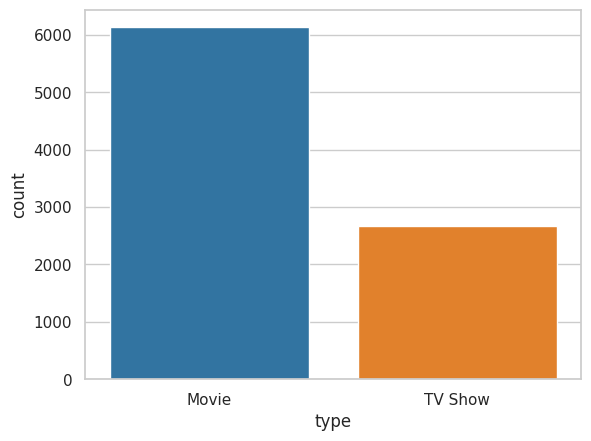

In [ ]:
sns.countplot(data=df,x='type')

In [ ]:
df_copy_2 = df_copy[df_copy['country_y'] != 'Unknow_Country']
country_counts = df_copy_2['country_y'].value_counts()
top_10=country_counts.head(10)

In [ ]:
top_10

United States     59349
India             22814
United Kingdom    12945
Japan              8679
France             8254
Canada             7915
Spain              5315
South Korea        5043
Germany            4383
Mexico             3941
Name: country_y, dtype: int64

Text(0, 0.5, 'TvShow/Movies')

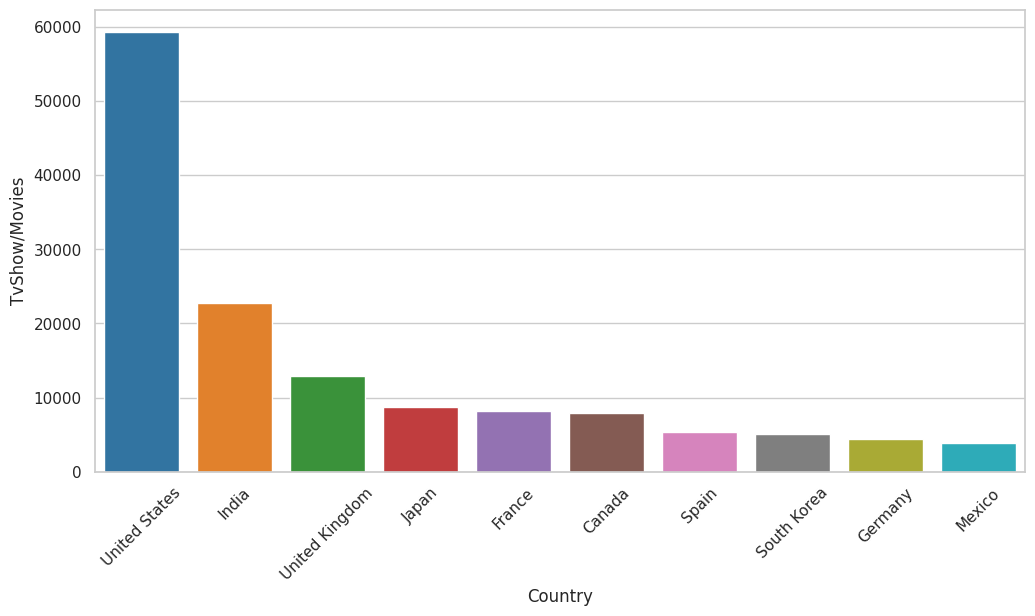

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.set_context("notebook", font_scale=1)
country_ax =sns.countplot(data=df_copy_2,x='country_y', order=top_10.index)
plt.xlabel("Country")
plt.ylabel("TvShow/Movies")

In [ ]:
rating_count = df['rating'].value_counts()
rating_count

TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 80
G                  41
TV-Y7-FV            6
Unknow_Rating       4
NC-17               3
UR                  3
74 min              1
84 min              1
66 min              1
Name: rating, dtype: int64

In [ ]:
rating_top_5 = rating_count.head(5)
rating_top_5

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

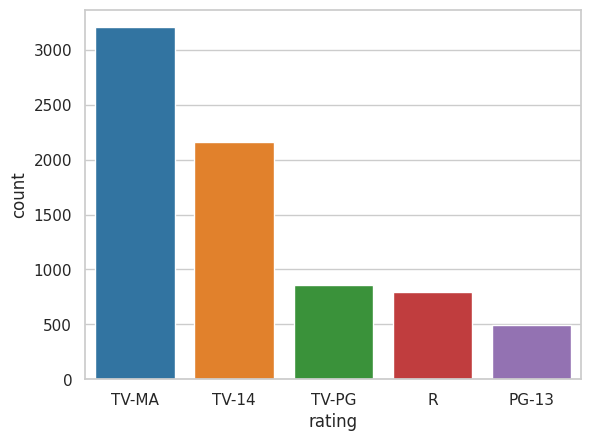

In [ ]:
sns.countplot(data=df,x='rating',order=rating_top_5.index)

<Axes: xlabel='listed_in_y', ylabel='count'>

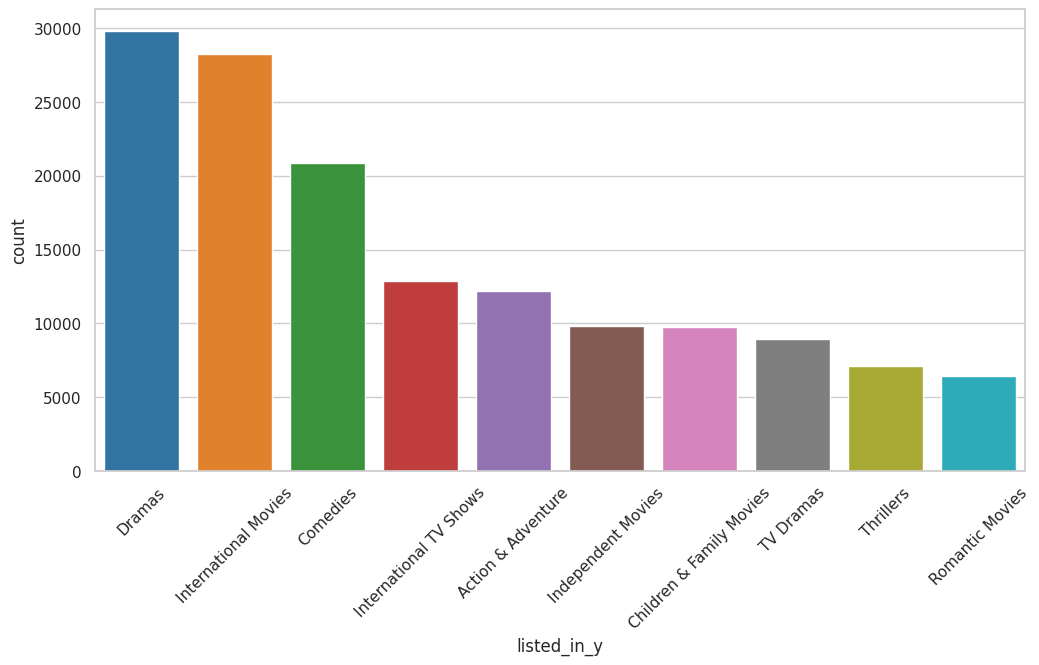

In [ ]:
listed_in_counts = df_copy['listed_in_y'].value_counts()
listed_in_counts
listed_in_top_10 = listed_in_counts.head(10)
listed_in_top_10
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.countplot(data=df_copy,x='listed_in_y',order=listed_in_top_10.index)

##Comparison of tv shows vs. movies in top_10 countries

In [ ]:
top_10_movie_countries = df_movies['country'].value_counts().head(10)
top_10_tv_show_countries = df_TvShows['country'].value_counts().head(10)
combined_data = pd.concat([top_10_movie_countries, top_10_tv_show_countries], axis=1)
combined_data.columns = ['Movies', 'TV Shows']

In [ ]:
combined_data.reset_index(inplace=True)

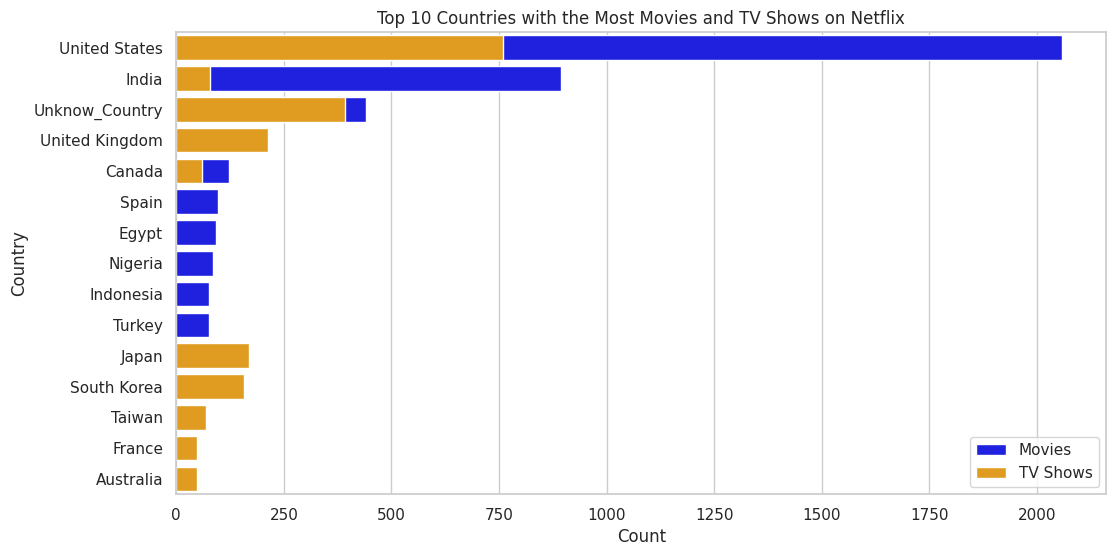

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_data, x='Movies', y='index', color='blue', label='Movies')
sns.barplot(data=combined_data, x='TV Shows', y='index', color='orange', label='TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Movies and TV Shows on Netflix')
plt.legend(loc='lower right')

Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [ ]:

# Convert the 'date_added' column to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:

# Extract the month from the 'date_added' column
df['month_added'] = df['date_added'].dt.month

# Group by month and count the number of TV shows and movies added each month
monthly_counts = df.groupby(['type', 'month_added'])['show_id'].count().unstack(fill_value=0)

# Find the best month to release TV shows
best_month_tv = monthly_counts[monthly_counts.index == 'TV Show'].idxmax(axis=1).values[0]
best_month_count_tv = monthly_counts[monthly_counts.index == 'TV Show'].max(axis=1).values[0]

# Find the best month to release movies
best_month_movie = monthly_counts[monthly_counts.index == 'Movie'].idxmax(axis=1).values[0]
best_month_count_movie = monthly_counts[monthly_counts.index == 'Movie'].max(axis=1).values[0]

What is the best time to launch a TV show?
a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [ ]:
# Convert the 'date_added' column to a datetime format
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'], errors='coerce')
df_movies['week_added'] = df_movies['date_added'].dt.isocalendar().week
df_movies['month_added_num'] = df_movies['date_added'].dt.month
df_movies['month_added'] = df_movies['date_added'].dt.month_name()

<ipython-input-221-dc46852422bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['date_added'] = pd.to_datetime(df_movies['date_added'], errors='coerce')
<ipython-input-221-dc46852422bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['week_added'] = df_movies['date_added'].dt.isocalendar().week
<ipython-input-221-dc46852422bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
# Group by country and count the number of unique movie titles
movie_counts_by_country = df_movies.groupby('country')['title'].nunique().reset_index()
movie_counts_by_country = movie_counts_by_country.sort_values(by='title', ascending=False).head(10)

In [ ]:
movie_counts_by_country

,country,title
525,United States,2058
218,India,892
640,Unknow_Country,440
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
428,Turkey,76


In [ ]:
# Group by country, week, and month to count the number of movie titles added
movie_counts_by_country_week = df_movies.groupby(['country', 'week_added', 'month_added'])['title'].nunique().reset_index()
movie_counts_by_country_week = movie_counts_by_country_week.sort_values(by='title', ascending=False).head(10)

In [ ]:
movie_counts_by_country_week

,country,week_added,month_added,title
1643,United States,1,January,101
1701,United States,44,November,86
1696,United States,40,October,60
640,India,9,March,58
1677,United States,27,July,56
629,India,1,December,54
1689,United States,35,September,53
1683,United States,31,August,50
1666,United States,18,May,50
685,India,44,November,50


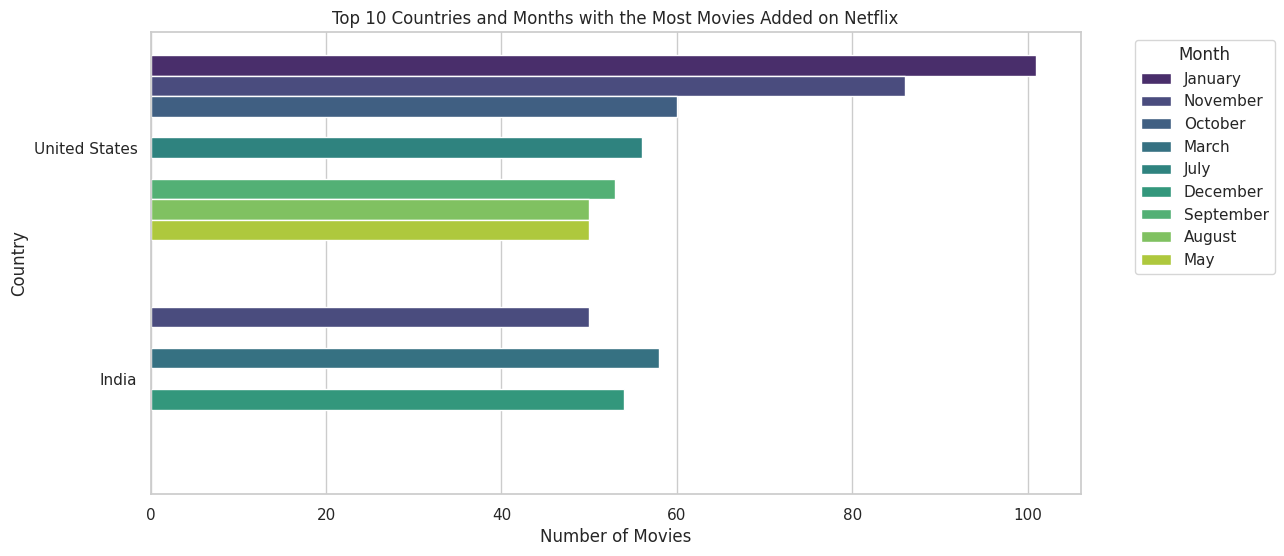

In [ ]:
# Create a bar plot to visualize the top 10 countries, weeks, and months with the most movie counts
plt.figure(figsize=(12, 6))
sns.barplot(data=movie_counts_by_country_week, x='title', y='country', hue='month_added', palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries and Months with the Most Movies Added on Netflix')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Convert the 'date_added' column to a datetime format
df_TvShows['date_added'] = pd.to_datetime(df_TvShows['date_added'], errors='coerce')
df_TvShows['week_added'] = df_TvShows['date_added'].dt.isocalendar().week
df_TvShows['month_added_num'] = df_TvShows['date_added'].dt.month
df_TvShows['month_added'] = df_TvShows['date_added'].dt.month_name()

<ipython-input-227-58dd2cff141e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TvShows['date_added'] = pd.to_datetime(df_TvShows['date_added'], errors='coerce')
<ipython-input-227-58dd2cff141e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TvShows['week_added'] = df_TvShows['date_added'].dt.isocalendar().week
<ipython-input-227-58dd2cff141e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
# Group by country and count the number of unique TvShows titles
# Filter out rows where the actor is "Unknown"
df_TvShows_copy = df_TvShows[df_TvShows['country'] != 'Unknow_Country']
TvShows_counts_by_country = df_TvShows_copy.groupby('country')['title'].nunique().reset_index()
TvShows_counts_by_country = TvShows_counts_by_country.sort_values(by='title', ascending=False).head(10)

In [ ]:
TvShows_counts_by_country

,country,title
160,United States,760
140,United Kingdom,213
83,Japan,169
120,South Korea,158
66,India,79
132,Taiwan,68
17,Canada,59
47,France,49
4,Australia,48
125,Spain,48


In [ ]:
# Group by country, week, and month to count the number of TvShows titles added
TvShows_counts_by_country_week = df_TvShows_copy.groupby(['country', 'week_added', 'month_added'])['title'].nunique().reset_index()
TvShows_counts_by_country_week = TvShows_counts_by_country_week.sort_values(by='title', ascending=False).head(5)

In [ ]:
TvShows_counts_by_country_week

,country,week_added,month_added,title
875,United States,27,July,23
846,United States,5,February,22
888,United States,37,September,22
871,United States,24,June,20
905,United States,50,December,20


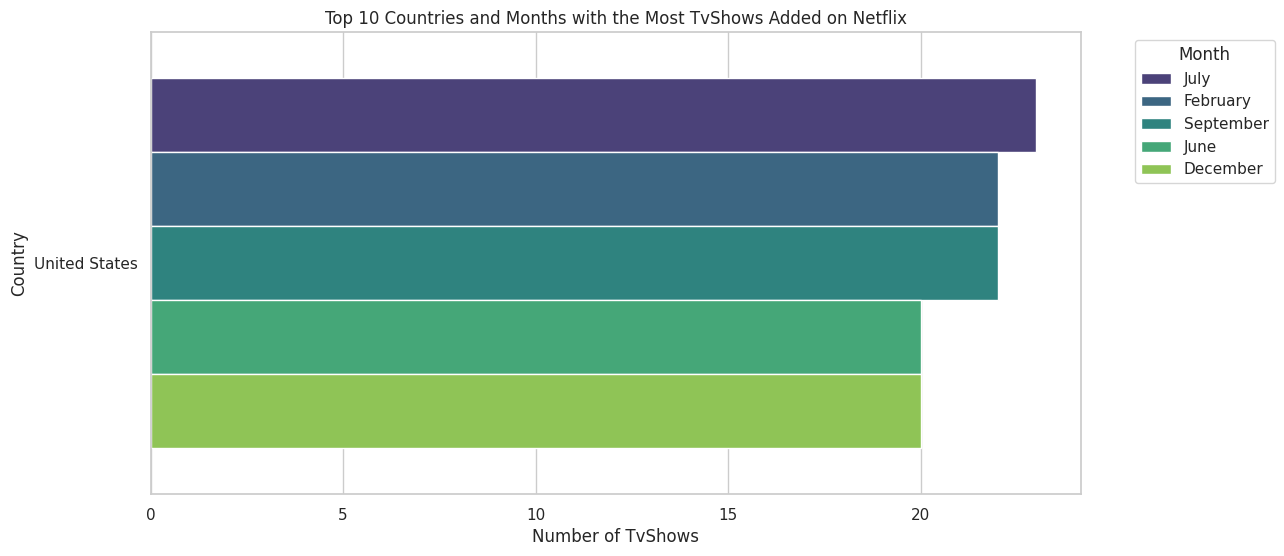

In [ ]:
# Create a bar plot to visualize the top 10 countries, weeks, and months with the most TvShows counts
plt.figure(figsize=(12, 6))
sns.barplot(data=TvShows_counts_by_country_week, x='title', y='country', hue='month_added', palette='viridis')
plt.xlabel('Number of TvShows')
plt.ylabel('Country')
plt.title('Top 10 Countries and Months with the Most TvShows Added on Netflix')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:

# Convert the 'date_added' column to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the week from the 'date_added' column
df['week_added'] = df['date_added'].dt.isocalendar().week

df['week_added']

0       38
1       38
2       38
3       38
4       38
        ..
8802    47
8803    27
8804    44
8805     2
8806     9
Name: week_added, Length: 8807, dtype: UInt32

In [ ]:
# Group by week and count the number of TV shows and movies added each week
weekly_counts = df.groupby(['type', 'week_added'])['show_id'].count().unstack(fill_value=0)
weekly_counts

week_added,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
type,,,,,,,,,,,,,,,,,,,,,
Movie,316,78,81,56,135,64,106,72,207,107,...,243,61,83,85,139,95,119,86,80,61
TV Show,56,30,32,32,73,33,41,38,47,28,...,75,37,51,35,60,45,70,51,52,43


In [ ]:
# Calculate the total number of TV shows and movies added each week
weekly_total = weekly_counts.sum(axis=1)
weekly_total

type
Movie      6131
TV Show    2666
dtype: int64

In [ ]:
# Find the best week to release TV shows
best_week_tv = weekly_counts[weekly_counts.index == 'TV Show'].idxmax(axis=1).values[0]
best_week_count_tv = weekly_counts[weekly_counts.index == 'TV Show'].max(axis=1).values[0]

In [ ]:
best_week_tv

27

In [ ]:
# Find the best week to release movies
best_week_movie = weekly_counts[weekly_counts.index == 'Movie'].idxmax(axis=1).values[0]
best_week_count_movie = weekly_counts[weekly_counts.index == 'Movie'].max(axis=1).values[0]

In [ ]:
best_week_movie

1

In [ ]:

# Extract the month from the 'date_added' column
df['month_added'] = df['date_added'].dt.month

# Group by month and count the number of TV shows and movies added each month
monthly_counts = df.groupby(['type', 'month_added'])['show_id'].count().unstack(fill_value=0)

# Find the best month to release TV shows
best_month_tv = monthly_counts[monthly_counts.index == 'TV Show'].idxmax(axis=1).values[0]
best_month_count_tv = monthly_counts[monthly_counts.index == 'TV Show'].max(axis=1).values[0]

# Find the best month to release movies
best_month_movie = monthly_counts[monthly_counts.index == 'Movie'].idxmax(axis=1).values[0]
best_month_count_movie = monthly_counts[monthly_counts.index == 'Movie'].max(axis=1).values[0]

In [ ]:
monthly_counts

month_added,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
type,,,,,,,,,,,,
Movie,546,382,529,550,439,492,565,519,519,545,498,547
TV Show,192,181,213,214,193,236,262,236,251,215,207,266


In [ ]:
best_month_tv

12.0

In [ ]:
best_month_movie

7.0

4. Analysis of actors/directors of different types of shows/movies.

a. Identify the top 10 directors who have appeared in most movies or TV shows.

b. Identify the top 10 directors who have appeared in most movies or TV shows.


In [ ]:
# Group by actor and type (TV Show or Movie) and count the number of unique titles
actor_counts = df_copy.groupby(['cast_y', 'type'])['show_id'].nunique().unstack().fillna(0)

# Calculate the total count of TV shows and movies for each actor
actor_counts['Total'] = actor_counts.sum(axis=1)

# Get the top 10 actors who have appeared in the most TV shows and movies
top_10_actors = actor_counts.sort_values(by='Total', ascending=False).head(10)

print("Top 10 actors who have appeared in the most TV shows and movies:")
print(top_10_actors)

Top 10 actors who have appeared in the most TV shows and movies:
type              Movie  TV Show  Total
cast_y                                 
Unknow_Cast       475.0    350.0  825.0
Anupam Kher        42.0      1.0   43.0
Shah Rukh Khan     35.0      0.0   35.0
Julie Tejwani      28.0      5.0   33.0
Naseeruddin Shah   32.0      0.0   32.0
Takahiro Sakurai    7.0     25.0   32.0
Rupa Bhimani       27.0      4.0   31.0
Om Puri            30.0      0.0   30.0
Akshay Kumar       30.0      0.0   30.0
Yuki Kaji          10.0     19.0   29.0


b. Identify the top 10 directors who have appeared in most movies or TV shows.


In [ ]:
director_counts = df_copy.groupby(['director_y', 'type'])['show_id'].nunique().unstack().fillna(0)

# Calculate the total count of TV shows and movies for each director
director_counts['Total'] = director_counts.sum(axis=1)

# Get the top 10 directors who have directed the most TV shows and movies
top_10_directors = director_counts.sort_values(by='Total', ascending=False).head(10)

print("Top 10 directors who have directed the most TV shows and movies:")
print(top_10_directors)

Top 10 directors who have directed the most TV shows and movies:
type                 Movie  TV Show   Total
director_y                                 
Unknow_Director      188.0   2446.0  2634.0
Rajiv Chilaka         22.0      0.0    22.0
Jan Suter             21.0      0.0    21.0
Raúl Campos           19.0      0.0    19.0
Marcus Raboy          15.0      1.0    16.0
Suhas Kadav           16.0      0.0    16.0
Jay Karas             15.0      0.0    15.0
Cathy Garcia-Molina   13.0      0.0    13.0
Jay Chapman           12.0      0.0    12.0
Martin Scorsese       12.0      0.0    12.0


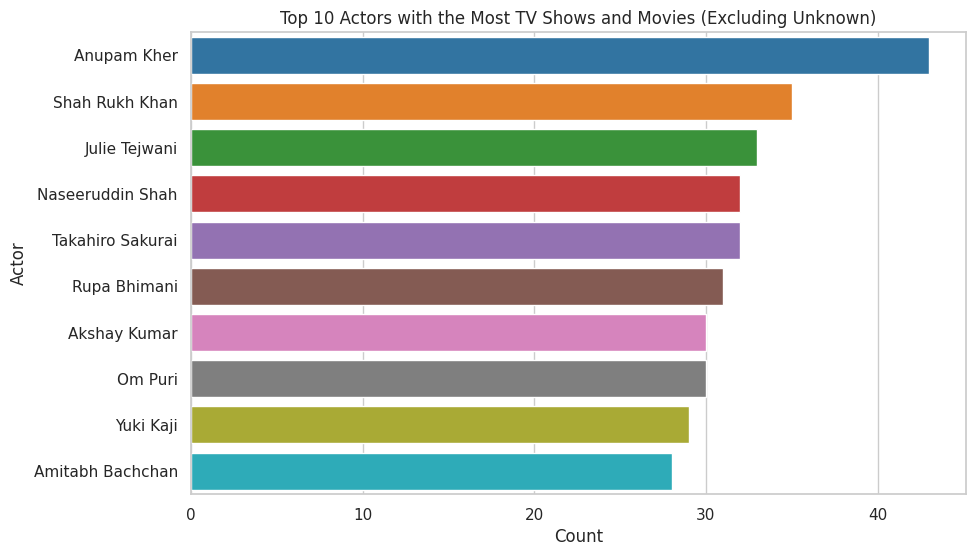

In [ ]:
# Filter out rows where the actor is "Unknown"
df_copy_2 = df_copy[df_copy['cast_y'] != 'Unknow_Cast']

# Group by actor and type (TV Show or Movie) and count the number of unique titles
actor_counts = df_copy_2.groupby(['cast_y', 'type'])['show_id'].nunique().unstack().fillna(0)

# Calculate the total count of TV shows and movies for each actor
actor_counts['Total'] = actor_counts.sum(axis=1)

# Get the top 10 actors who have appeared in the most TV shows and movies
top_10_actors = actor_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors['Total'], y=top_10_actors.index, orient='h')
plt.title('Top 10 Actors with the Most TV Shows and Movies (Excluding Unknown)')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

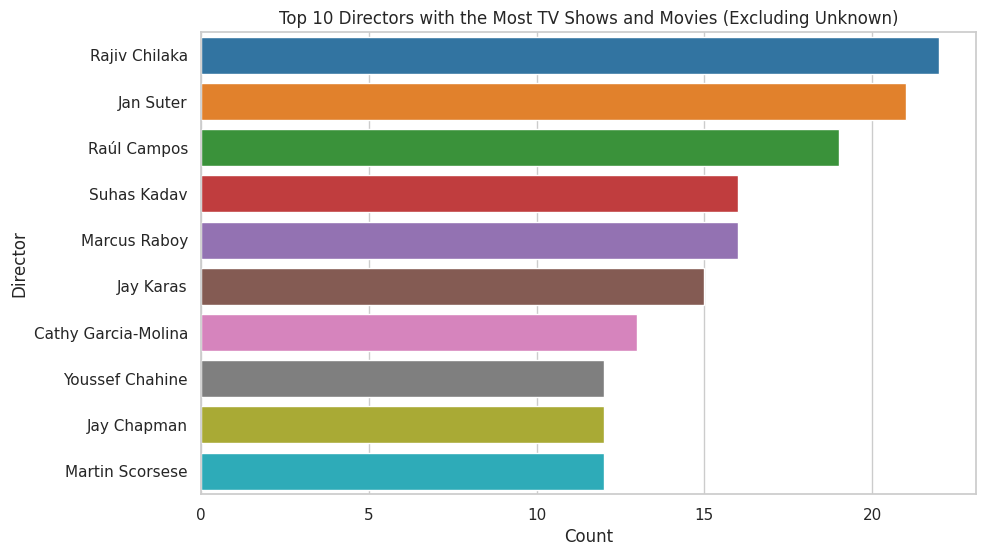

In [ ]:


# Filter out rows where the director is "Unknown"
df_copy_2 = df_copy[df_copy['director_y'] != 'Unknow_Director']

# Group by director and type (TV Show or Movie) and count the number of unique titles
director_counts = df_copy_2.groupby(['director_y', 'type'])['show_id'].nunique().unstack().fillna(0)

# Calculate the total count of TV shows and movies for each director
director_counts['Total'] = director_counts.sum(axis=1)

# Get the top 10 directors who have directed the most TV shows and movies
top_10_directors = director_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors['Total'], y=top_10_directors.index, orient='h')
plt.title('Top 10 Directors with the Most TV Shows and Movies (Excluding Unknown)')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

Which genre movies are more popular or produced more
Hint : We want you to apply the word cloud on the genre columns to know which kind
of genre is produced

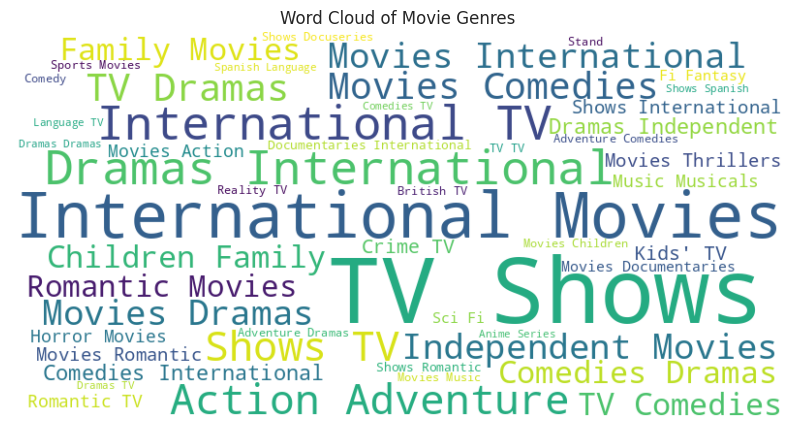

In [ ]:
from wordcloud import WordCloud


# Combine all genre strings into a single string
all_genres = ' '.join(df['listed_in'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(all_genres)

# Display the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')
plt.show()

#we can see Tv Shows and International Movies are more popular geners

Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)

In [ ]:
# Convert the 'date_added' column to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Calculate the difference between 'date_added' and 'release_year' in days
df['days_to_add'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Find the mode (most common value) of the 'days_to_add' column
best_time_to_add = df['days_to_add'].mode().values[0]

print(f"The best time to add a movie to Netflix after release is approximately {best_time_to_add} days.")

The best time to add a movie to Netflix after release is approximately 334.0 days.


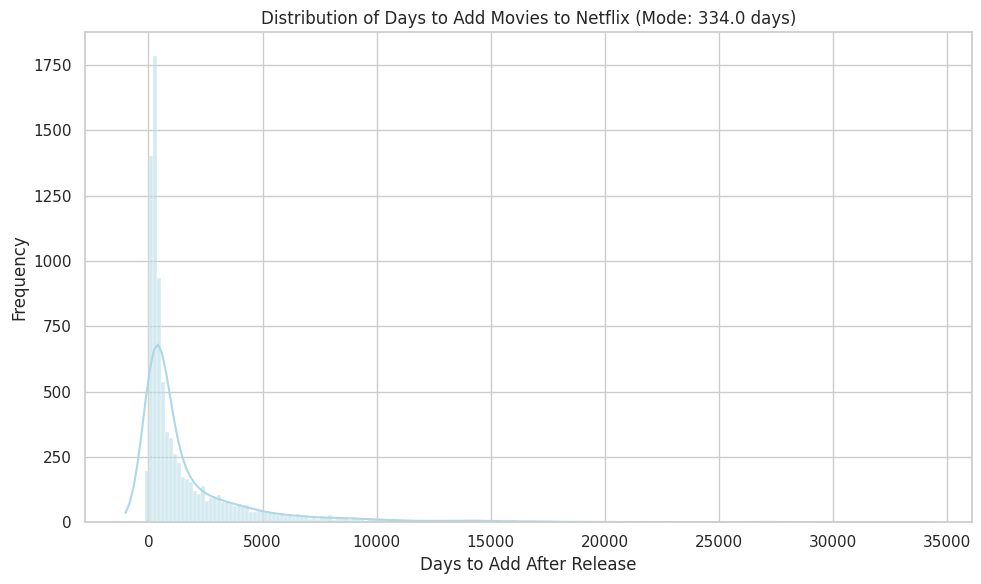

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='days_to_add', kde=True, color='lightblue')

# Set labels and title
plt.xlabel('Days to Add After Release')
plt.ylabel('Frequency')
plt.title(f'Distribution of Days to Add Movies to Netflix (Mode: {best_time_to_add} days)')

# Show the plot
plt.tight_layout()
plt.show()

Summary:

*  The dataset contains information about movies and TV shows available on Netflix.
*  It includes columns such as Show ID, Type (Movie or TV Show), Title, Director, Cast, Country, Date Added, Release Year, Rating, Duration, Listed In (Genre), and Description.
*  Some columns have missing values, which have been handled as follows:
For categorical variables with null values, the missing values have been replaced with "Unknown_ColumnName."
*   For continuous variables (e.g., duration of movies) with null values, the missing values have been replaced with 0.

###Analysis:

#1.Counts of Categorical Variables:
*   The count of unique values in categorical variables (e.g., Type,Director, Country, Rating) has been calculated.
*   This analysis helps understand the variety of content on Netflix.

#2.Comparison of TV Shows vs. Movies:
*  The number of movies produced in each country's top 10 countries has been identified.
*  The number of TV shows produced in each country's top 10 countries has also been identified.
*  This analysis provides insights into which countries produce the most content for both TV shows and movies.

#3.Best Time to Launch:
* We can see for Movies July month and first week of January.
* We can see for TvShows December month and June 1st week are good to launch

#4.Analysis of Actors and Directors:
*  The top 10 actors who have appeared in the most TV shows and movies have been identified.
* The top 10 directors who have directed the most TV shows and movies have also been identified.
* This analysis highlights the most prolific actors and directors on Netflix.

#5.Popular Genres:
* A word cloud analysis has been conducted on genre columns to identify which genres are more popular and produced more.
* This analysis provides insights into the most popular genres on Netflix are Tv Shows and International Tv.

#6.Days to Add Movies After Release:
* The time it takes to add movies to Netflix after their release has been analyzed.
* The mode (most common value) of the days to add movies is approximately 344 days.
* This analysis helps in understanding when movies are typically added to the platform after their release.

#7.Visualization:
*  A histogram,countplot etc has been created to visualize the distribution of days it takes to add movies to Netflix after their release.
* The mode (most common value) of the days to add movies is highlighted in the plot.
#Visualization provides a clear view of the distribution.
